In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import joblib
from xgboost import XGBClassifier

In [112]:
train_df = pd.read_csv('Train_Data.csv')
test_df = pd.read_csv('Test_Data.csv')

In [113]:
print('Train Data Info:')
train_df.info()
print('\nTrain Data Description:')
print(train_df.describe())
print('\nTrain Data Head:')
print(train_df.head())

print('\nTest Data Info:')
test_df.info()
print('\nTest Data Description:')
print(test_df.describe())
print('\nTest Data Head:')
print(test_df.head())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       1954 non-null   float64
 1   RIAGENDR   1948 non-null   float64
 2   PAQ605     1953 non-null   float64
 3   BMXBMI     1948 non-null   float64
 4   LBXGLU     1953 non-null   float64
 5   DIQ010     1948 non-null   float64
 6   LBXGLT     1955 non-null   float64
 7   LBXIN      1957 non-null   float64
 8   age_group  1952 non-null   object 
dtypes: float64(8), object(1)
memory usage: 138.4+ KB

Train Data Description:
               SEQN     RIAGENDR       PAQ605       BMXBMI       LBXGLU  \
count   1954.000000  1948.000000  1953.000000  1948.000000  1953.000000   
mean   78683.621801     1.510267     1.825397    27.965400    99.491039   
std     2924.115709     0.500023     0.399449     7.327616    16.774665   
min    73564.000000     1.000000     1.000000    14.500000

In [114]:
print("\nMissing values in Train Data:")
print(train_df.isnull().sum())

print("\nData types in Train Data:")
print(train_df.dtypes)

print("\nMissing values in Test Data:")
print(test_df.isnull().sum())

print("\nData types in Test Data:")
print(test_df.dtypes)


Missing values in Train Data:
SEQN         12
RIAGENDR     18
PAQ605       13
BMXBMI       18
LBXGLU       13
DIQ010       18
LBXGLT       11
LBXIN         9
age_group    14
dtype: int64

Data types in Train Data:
SEQN         float64
RIAGENDR     float64
PAQ605       float64
BMXBMI       float64
LBXGLU       float64
DIQ010       float64
LBXGLT       float64
LBXIN        float64
age_group     object
dtype: object

Missing values in Test Data:
SEQN        2
RIAGENDR    2
PAQ605      1
BMXBMI      1
LBXGLU      1
DIQ010      1
LBXGLT      2
LBXIN       1
dtype: int64

Data types in Test Data:
SEQN        float64
RIAGENDR    float64
PAQ605      float64
BMXBMI      float64
LBXGLU      float64
DIQ010      float64
LBXGLT      float64
LBXIN       float64
dtype: object


In [115]:
# Impute missing values with the median for numerical columns
for col in train_df.columns:
  if train_df[col].dtype != object:
    train_df[col] = train_df[col].fillna(train_df[col].median())


for col in test_df.columns:
  if test_df[col].dtype != object:
    test_df[col] = test_df[col].fillna(test_df[col].median())

# For categorical column 'age_group' in train_df, impute with mode
train_df["age_group"] = train_df["age_group"].fillna(train_df["age_group"].mode()[0])

print("Missing values after imputation in Train Data:")
print(train_df.isnull().sum())

print("Missing values after imputation in Test Data:")
print(test_df.isnull().sum())

train_df.to_csv("Train_Data_cleaned.csv", index=False)
test_df.to_csv("Test_Data_cleaned.csv", index=False)

Missing values after imputation in Train Data:
SEQN         0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
age_group    0
dtype: int64
Missing values after imputation in Test Data:
SEQN        0
RIAGENDR    0
PAQ605      0
BMXBMI      0
LBXGLU      0
DIQ010      0
LBXGLT      0
LBXIN       0
dtype: int64


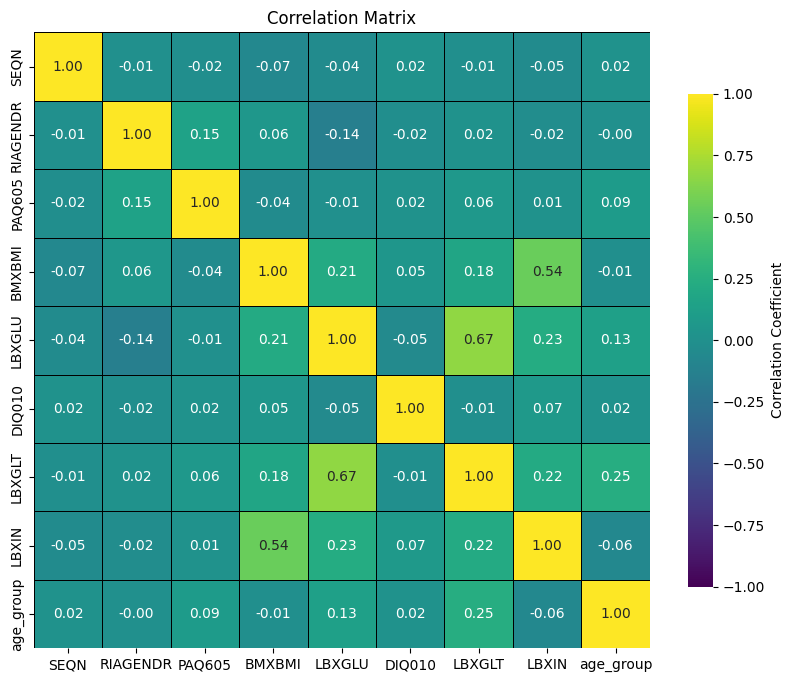

In [118]:
corr_matrix =train_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', vmin=-1, vmax=1,linewidths=0.5,linecolor='black',square=True,cbar_kws={'shrink': .8, 'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix')
plt.show()

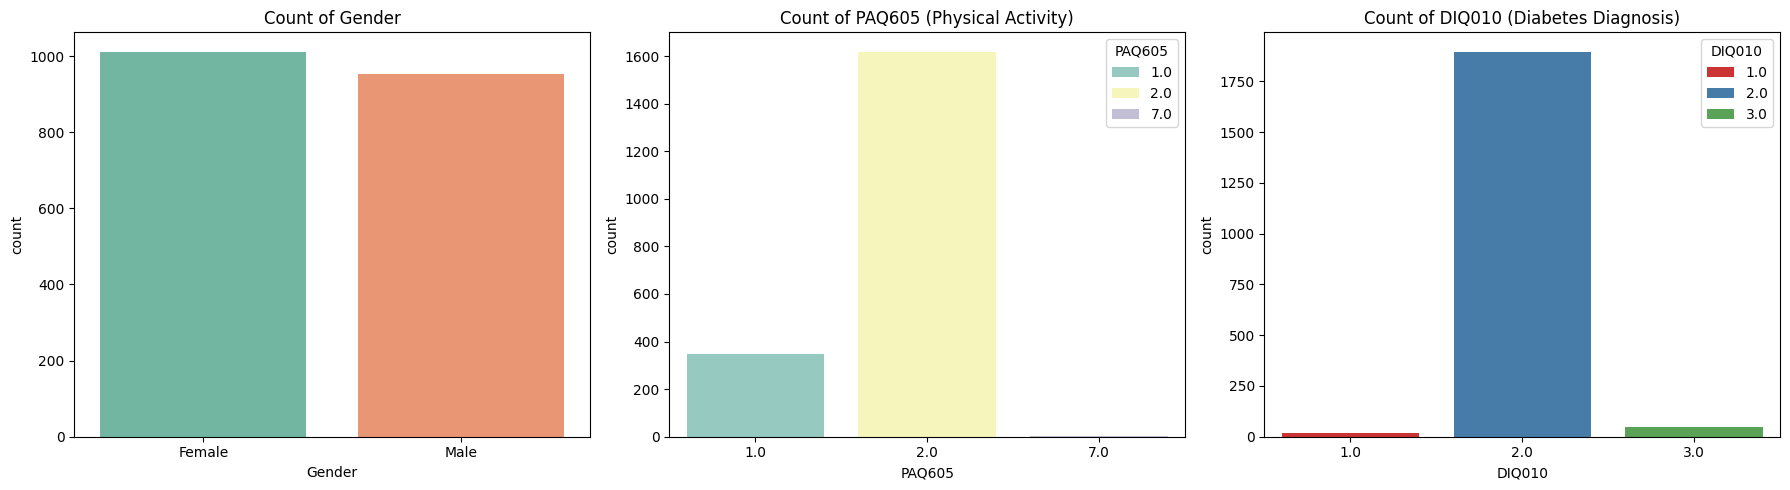

In [122]:
# Map gender for readability
train_df['Gender'] = train_df['RIAGENDR'].map({1.0: 'Male', 2.0: 'Female'})

# Create a 1x3 subplot grid for the count plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Countplot for Gender
sns.countplot(x='Gender', data=train_df, ax=axes[0], palette='Set2', hue='Gender')
axes[0].set_title("Count of Gender")

# Countplot for PAQ605 (Physical Activity)
sns.countplot(x='PAQ605', data=train_df, ax=axes[1], palette='Set3', hue='PAQ605')
axes[1].set_title("Count of PAQ605 (Physical Activity)")

# Countplot for DIQ010 (Diabetes Diagnosis)
sns.countplot(x='DIQ010', data=train_df, ax=axes[2], palette='Set1', hue='DIQ010')
axes[2].set_title("Count of DIQ010 (Diabetes Diagnosis)")


plt.tight_layout()
plt.show()

In [124]:
# Print value counts
print(" Value Counts:")
print("\nGender:")
print(train_df['Gender'].value_counts())

print("\nPAQ605 (Physical Activity):")
print(train_df['PAQ605'].value_counts())

print("\nDIQ010 (Diabetes Diagnosis):")
print(train_df['DIQ010'].value_counts())

 Value Counts:

Gender:
Gender
Female    1012
Male       954
Name: count, dtype: int64

PAQ605 (Physical Activity):
PAQ605
2.0    1619
1.0     346
7.0       1
Name: count, dtype: int64

DIQ010 (Diabetes Diagnosis):
DIQ010
2.0    1897
3.0      50
1.0      19
Name: count, dtype: int64


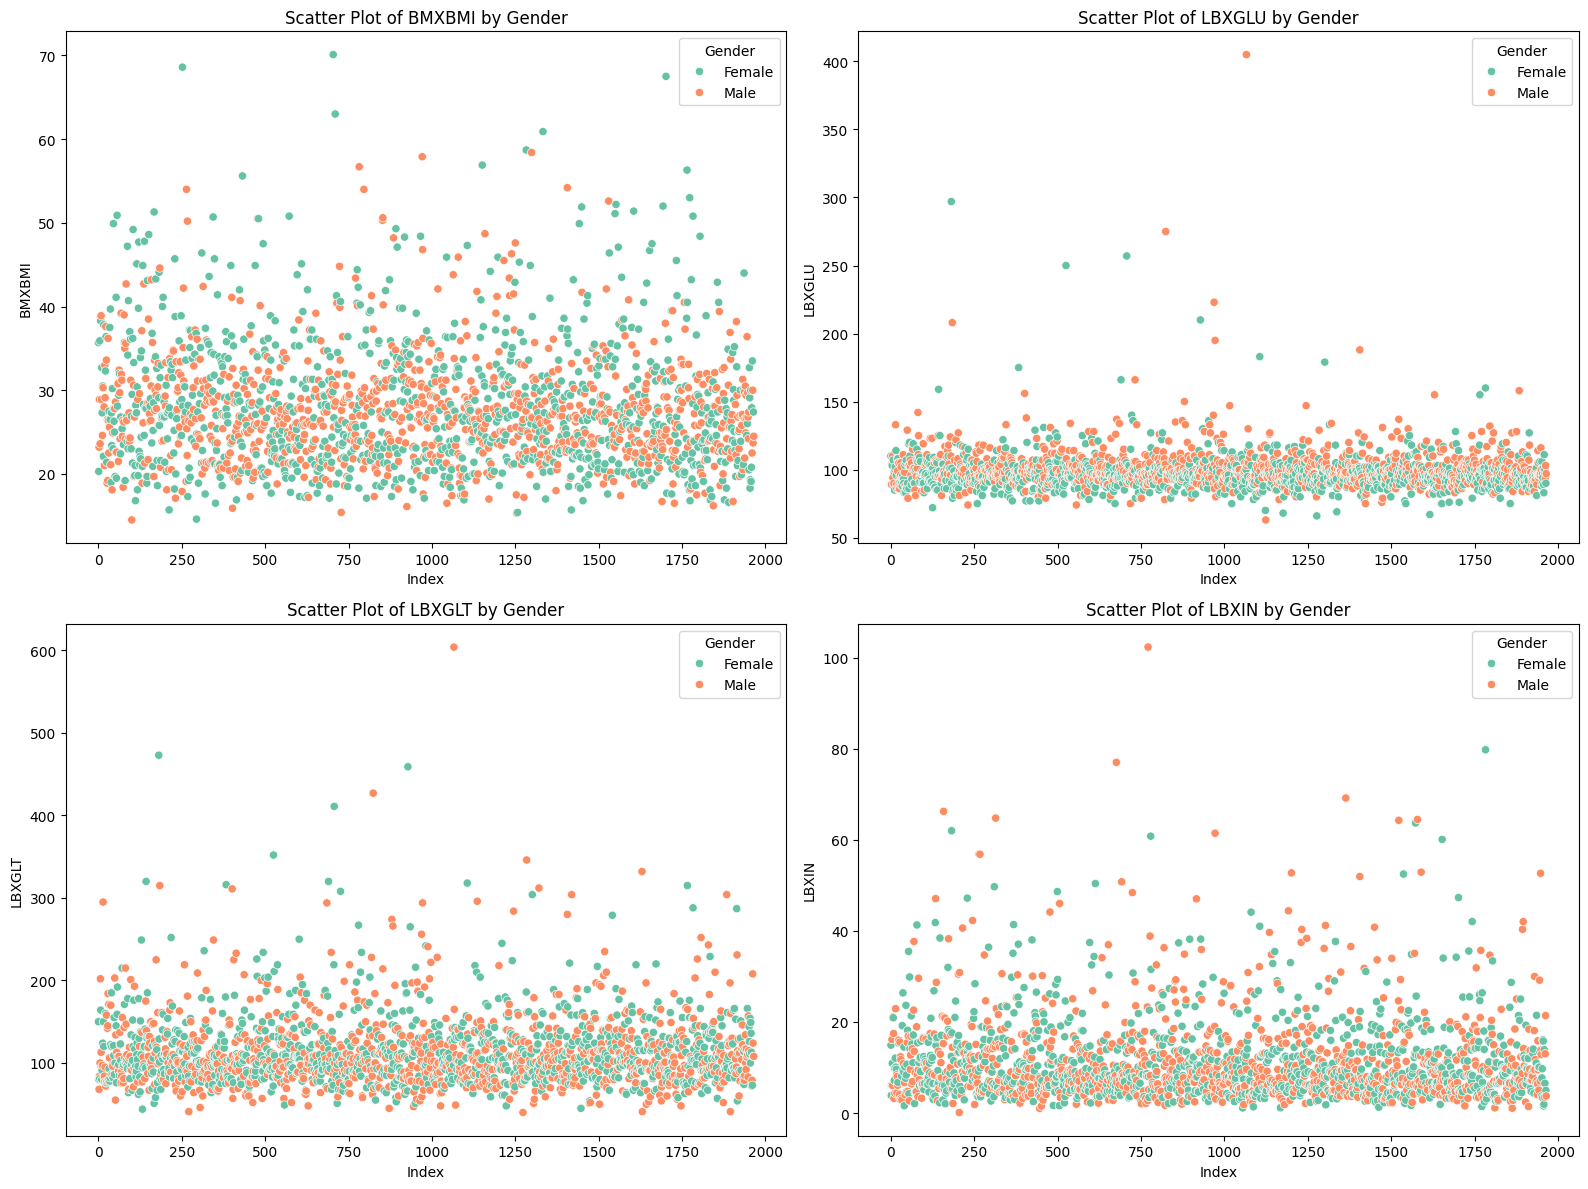

In [125]:
# Create scatter plots of each variable against index, color-coded by gender

columns_to_plot = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2x2 grid
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.scatterplot(x=train_df.index, y=train_df[col], hue=train_df['Gender'], ax=axes[i], palette='Set2')
    axes[i].set_title(f'Scatter Plot of {col} by Gender')
    axes[i].set_xlabel("Index")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

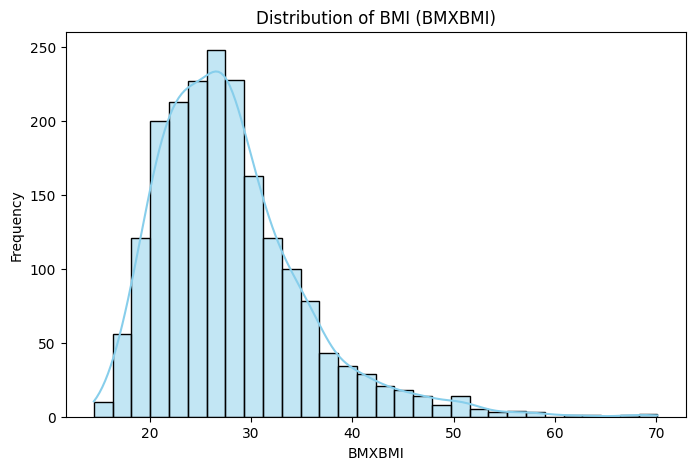

In [126]:
plt.figure(figsize=(8, 5))
sns.histplot(train_df['BMXBMI'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of BMI (BMXBMI)")
plt.xlabel("BMXBMI")
plt.ylabel("Frequency")
plt.show()

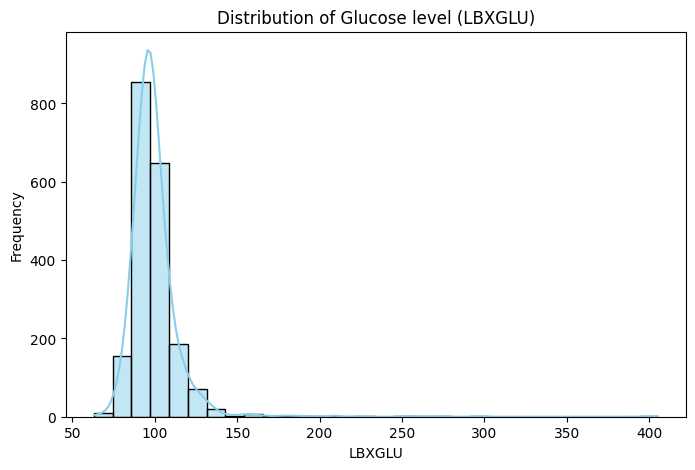

In [127]:
plt.figure(figsize=(8, 5))
sns.histplot(train_df['LBXGLU'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Glucose level (LBXGLU)")
plt.xlabel("LBXGLU")
plt.ylabel("Frequency")
plt.show()

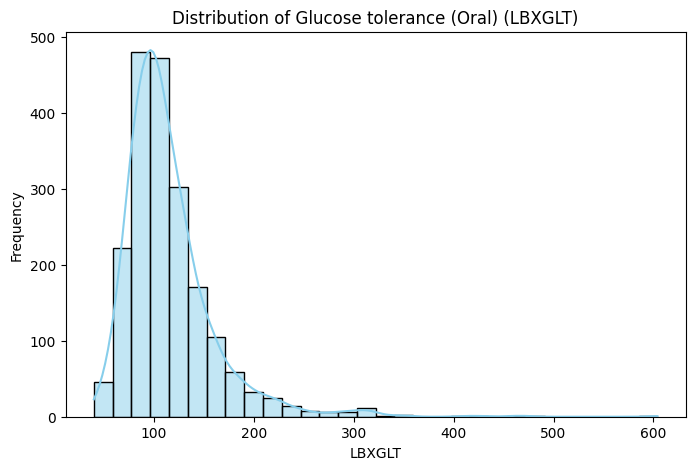

In [128]:
plt.figure(figsize=(8, 5))
sns.histplot(train_df['LBXGLT'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Glucose tolerance (Oral) (LBXGLT)")
plt.xlabel("LBXGLT")
plt.ylabel("Frequency")
plt.show()

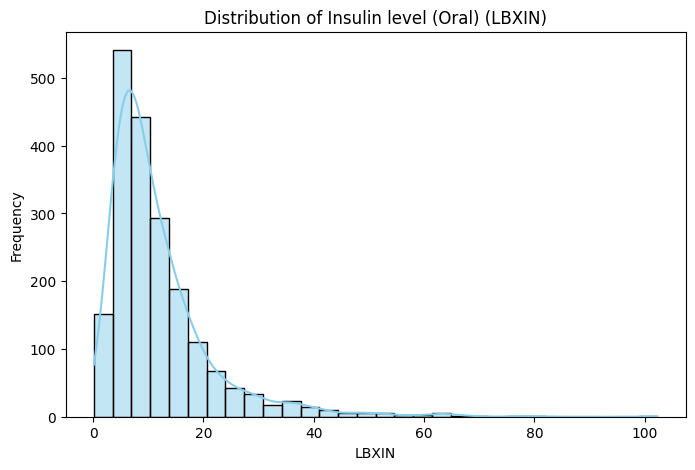

In [129]:
plt.figure(figsize=(8, 5))
sns.histplot(train_df['LBXIN'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Insulin level (Oral) (LBXIN)")
plt.xlabel("LBXIN")
plt.ylabel("Frequency")
plt.show()

<Axes: xlabel='RIAGENDR', ylabel='BMXBMI'>

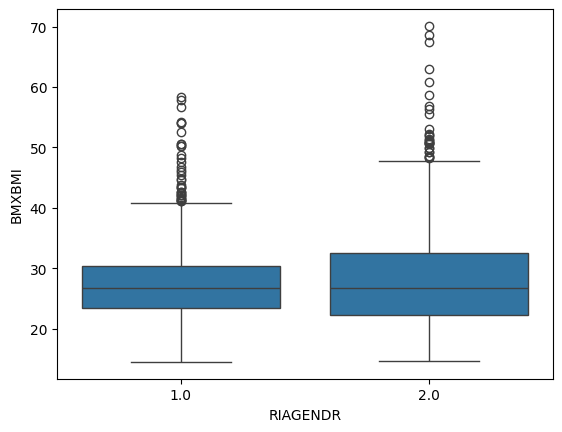

In [130]:
sns.boxplot(x='RIAGENDR', y='BMXBMI', data=train_df)

<Axes: xlabel='age_group', ylabel='LBXGLU'>

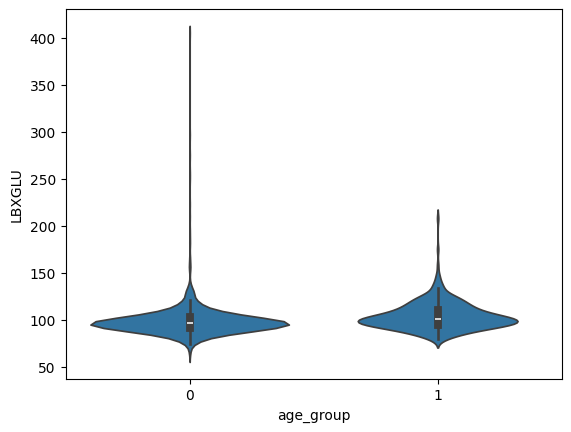

In [131]:
sns.violinplot(x='age_group', y='LBXGLU', data=train_df)

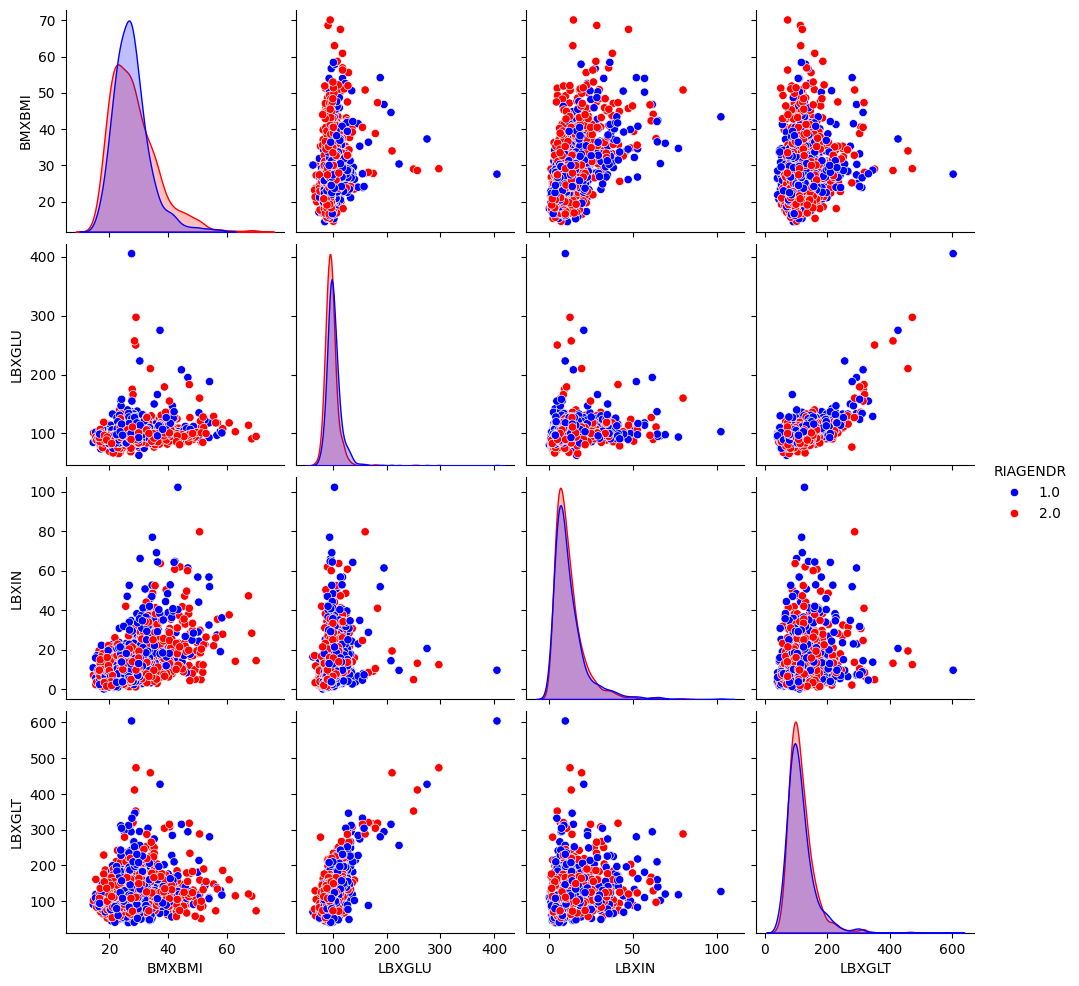

In [132]:
custom_palette = {1.0: 'blue', 2.0: 'red'}
sns.pairplot(train_df, hue='RIAGENDR', palette=custom_palette,vars=['BMXBMI', 'LBXGLU', 'LBXIN', 'LBXGLT'])

In [134]:
# Group-wise MEAN by Gender
gender_means = train_df.groupby('Gender')[['BMXBMI', 'LBXGLU', 'LBXGLT']].mean()
print(" Mean values grouped by Gender:\n")
print(gender_means)

# Group-wise MEDIAN by Age Group
agegroup_medians = train_df.groupby('age_group')[['BMXBMI', 'LBXIN']].median()
print("\n Median values grouped by Age Group:\n")
print(agegroup_medians)

 Mean values grouped by Gender:

           BMXBMI      LBXGLU      LBXGLT
Gender                                   
Female  28.364625   97.173913  115.993083
Male    27.519916  101.915094  114.139413

 Median values grouped by Age Group:

           BMXBMI  LBXIN
age_group               
0            26.8  9.135
1            27.1  8.540


In [80]:
train_df.groupby('age_group')[['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']].describe()

BMXBMI                                                       \
            count       mean       std   min   25%   50%     75%   max   
age_group                                                                
Adult      1652.0  27.987107  7.590954  14.5  22.7  26.8  31.400  70.1   
Senior      314.0  27.784395  5.486147  16.8  24.1  27.1  30.575  52.2   

           LBXGLU              ... LBXGLT          LBXIN             \
            count        mean  ...    75%    max   count       mean   
age_group                      ...                                    
Adult      1652.0   98.556295  ...  124.0  604.0  1652.0  12.124104   
Senior      314.0  104.305732  ...  167.0  346.0   314.0  10.407420   

                                                         
                 std   min    25%    50%    75%     max  
age_group                                                
Adult      10.066225  0.14  5.930  9.135  14.88  102.29  
Senior      7.625149  1.02  5.255  8.540  13.16   52.89  

[2 rows x 32 columns]

In [81]:
train_df.groupby('age_group')[['RIAGENDR', 'PAQ605', 'DIQ010']].apply(lambda x: x.mode())

,,RIAGENDR,PAQ605,DIQ010
age_group,,,,
Adult,0,2.0,2.0,2.0
Senior,0,2.0,2.0,2.0


In [82]:
train_df['age_group'].value_counts()

,count
age_group,
Adult,1652
Senior,314


In [83]:
train_df['age_group'].value_counts()/len(train_df)

,count
age_group,
Adult,0.840285
Senior,0.159715


In [84]:
train_df['PAQ605'].value_counts()

,count
PAQ605,
2.0,1619
1.0,346
7.0,1


In [117]:
label=LabelEncoder()
train_df['age_group']=label.fit_transform(train_df['age_group'])
label_dict = dict(zip(label.classes_, label.transform(label.classes_)))

In [86]:
X = train_df[['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN','DIQ010']]
y = train_df['age_group']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [94]:
f1_rf = f1_score(y_test, y_pred_rf, zero_division=0)

F1 Score: 0.11594202898550725


In [96]:
from imblearn.over_sampling import SMOTE

train_df['glu_ins_ratio'] = train_df['LBXGLU'] / train_df['LBXIN']
train_df['bmi_category'] = pd.cut(train_df['BMXBMI'], bins=[0, 25, 30, 100], labels=[0, 1, 2])  # Normal, Overweight, Obese
train_df['bmi_category'] = train_df['bmi_category'].astype(int)
smote = SMOTE(random_state=42)
X = train_df[['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU','DIQ010', 'LBXGLT', 'LBXIN','glu_ins_ratio','bmi_category']]
y = train_df['age_group']
X_res, y_res = smote.fit_resample(X, y)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [102]:
param_grid = {'max_depth': [3, 5, 7, 10],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 5],'criterion': ['gini', 'entropy']}
rf1 = RandomForestClassifier(class_weight='balanced', random_state=42)
grid_search = GridSearchCV(rf1, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred_rf1 = best_model.predict(X_test)

In [103]:
f1_rf1 = f1_score(y_test, y_pred_rf1, zero_division=0)

In [104]:
f1_rf1

0.8626198083067093

In [105]:
test_df.drop(['SEQN'],axis=1,inplace=True)

In [106]:
test_df['glu_ins_ratio'] = test_df['LBXGLU'] / test_df['LBXIN']
test_df['bmi_category'] = pd.cut(test_df['BMXBMI'], bins=[0, 25, 30, 100], labels=[0, 1, 2])
test_df['bmi_category'] = test_df['bmi_category'].cat.add_categories(-1).fillna(-1).astype(int)

In [107]:
X

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,glu_ins_ratio,bmi_category
0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,7.377599,2
1,2.0,2.0,20.3,89.0,2.0,80.0,3.85,23.116883,0
2,1.0,2.0,23.2,89.0,2.0,68.0,6.14,14.495114,0
3,1.0,2.0,28.9,104.0,2.0,84.0,16.15,6.439628,1
4,2.0,1.0,35.9,103.0,2.0,81.0,10.92,9.432234,2
...,...,...,...,...,...,...,...,...,...
1961,2.0,2.0,33.5,100.0,2.0,73.0,6.53,15.313936,2
1962,1.0,2.0,30.0,93.0,2.0,208.0,13.02,7.142857,1
1963,1.0,2.0,23.7,103.0,2.0,124.0,21.41,4.810836,0
1964,2.0,2.0,27.4,90.0,2.0,108.0,4.99,18.036072,1


In [108]:
y_test_pred = best_model.predict(test_df)

In [109]:
result = pd.DataFrame({'age_group': y_test_pred})

In [110]:
result.to_csv('submission_1.csv', index=False)